## Wind Turbines

The `WindTurbine` base class is used to model of the available wind turbine types.

Wind turbines are modelled by:

- Name
- Hub height
- Rotor diameter
- Power curve
- Ct curve

**Setup**

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%%capture
# clone and install if PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !git clone https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git
    %cd PyWake
    !pip install -e .

PyWake contains a few predefined turbines, e.g. the V80 from Hornsrev1

# V80 example turbine

PyWake contains a few predefined turbines, e.g. the V80 from Hornsrev1

In [2]:
from py_wake.examples.data.hornsrev1 import V80

wt = V80()
print('Diameter', wt.diameter())
print('Hub height', wt.hub_height())

Diameter 80
Hub height 70


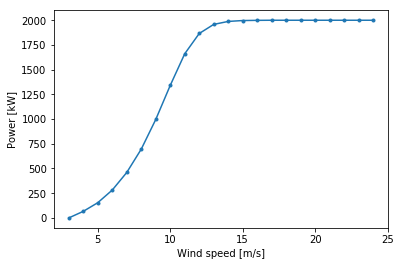

In [3]:
ws = np.arange(3,25)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')
plt.plot(ws, wt.power(ws),'.-')

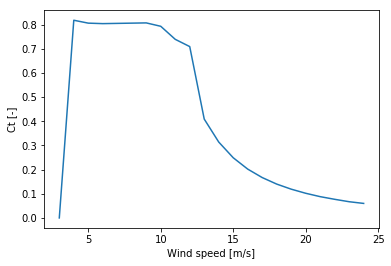

In [4]:
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Ct [-]')
plt.plot(ws, wt.ct(ws))

The V80 object is a [`OneTypeWindTurbines`](../docs/build/html/_src_docs/wind_turbines/OneTypeOnlyWindTurbines.html) object which is a subclass of the [`WindTurbines`](../docs/build/html/_src_docs/wind_turbines/WindTurbines.html) class.

In [ ]:
ws = np.arange(3,25)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')
plt.plot(ws, wt.power(ws),'.-')

In [ ]:
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Ct [-]')
plt.plot(ws, wt.ct(ws))

The V80 object only contains one wind turbine type.

Let us define a new [`WindTurbines`](../docs/build/html/_src_docs/WindTurbines.html#py_wake.wind_turbines.WindTurbines) object with two turbines; MyWT1 and MyWT2



In [ ]:
from py_wake.wind_turbines import WindTurbines
def ct(ws):
    # CT curve for both types
    u = [0, 3, 4, 12, 25]
    ct = [1/9, 1/9, 8/9, 8/9,1/9]
    return np.interp(ws, u, ct)

def MyWT1_Power(ws):
    # Power curve for MyWT1
    u = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 25]
    p = [0, 66, 154, 282, 460, 696, 996, 1341, 1661, 1866, 1958, 1988, 1997, 1999, 2000, 2000]
    return np.interp(ws, u, p)

def MyWT2_Power(ws):
    # Power curve (function) for MyWT2
    return np.minimum(2000, np.maximum(0, ws**3))

wts = WindTurbines(names=['MyWT1','MyWT2'],
                   diameters=[80,100],
                   hub_heights=[70,80],
                   ct_funcs=[ct, # MyWT1
                             ct], # MyWT2
                   power_funcs=[MyWT1_Power, MyWT2_Power],
                   power_unit='kW'
                  )

In [ ]:
print('Diameter', wts.diameter([0,1]))
print('Hub height', wts.hub_height([0,1]))

In [ ]:
ws = np.arange(3,25)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')
for t in [0,1]:
    plt.plot(ws, wts.power(ws,t),'.-', label=wts.name(t))
plt.legend()

Finally, the `WindTurbines` class has a method to plot wind turbines in a wind farm given the positions


In [ ]:
wt_x = [0,200,0,200]
wt_y = [0,0,200,200]
wt_types = [0,1,0,1] 
wts.plot(wt_x, wt_y, wt_types)
plt.ylim([-100,300])


Where the gray circles reflect the rotor size